In [1]:
!pip install pyairtable

In [213]:
import os
import requests
import pandas as pd
from pyairtable import Table
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import math
import seaborn as sns
import plotly.express as px

In [73]:
# uncomment this and add key here ''
api_key = 'keyfr6BmiKOdAURea'

In [74]:
base_id = "apptUkOtU3W8HxbQQ"
table_name = "Organization List"

In [75]:
table = Table(api_key, base_id, table_name)

In [76]:
table

<Table base_id=apptUkOtU3W8HxbQQ table_name=Organization List>

In [77]:
all_data = table.all()
len(all_data)

1214

In [78]:
all_data[0]

{'id': 'rec00MDWnik2I0nA8',
 'fields': {'Web': 'https://softsmile.com/',
  'Original Source': 'TechNYC',
  'Owner': {'id': 'usr9BPdDIhuQuzTkj',
   'email': 'atownsend@cornell.edu',
   'name': 'Anthony Townsend'},
  'Urban Tech Screening': 'Failed',
  'Sniff Test Notes': 'dental software\n',
  'Company': 'SoftSmile'},
 'createdTime': '2022-01-05T20:22:37.000Z'}

In [79]:
df = pd.json_normalize(all_data, sep='_')
df.head()

,id,createdTime,fields_Web,fields_Original Source,fields_Owner_id,fields_Owner_email,fields_Owner_name,fields_Urban Tech Screening,fields_Sniff Test Notes,fields_Company,...,fields_Contact Name,fields_Position,fields_Survey Response,fields_Year Acquired or Dissolved,fields_Valuation at Acquisition,fields_Revenue/Budget,fields_Form,fields_Keywords,fields_Pre-Publish Review,fields_Social Media
0,rec00MDWnik2I0nA8,2022-01-05T20:22:37.000Z,https://softsmile.com/,TechNYC,usr9BPdDIhuQuzTkj,atownsend@cornell.edu,Anthony Townsend,Failed,dental software\n,SoftSmile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,rec019MVAabtvqZ29,2022-01-05T20:22:37.000Z,https://www.loop.ai/,TechNYC,usr9BPdDIhuQuzTkj,atownsend@cornell.edu,Anthony Townsend,Failed,looks like AI consultants\n,Loop AI Labs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,rec020xb3hcLqlI4e,2022-01-05T20:22:37.000Z,https://www.yapp.us/,TechNYC,usr9BPdDIhuQuzTkj,atownsend@cornell.edu,Anthony Townsend,Failed,movile apps\n,Yapp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,rec0C1X6J53tsmZHo,2021-10-26T16:28:52.000Z,https://navigine.com,NaN,usrzlz6zDGzjGmaEg,mfd64@cornell.edu,Max Dumas,Passed,Indoor navigation and way-finding systems\n,Navigine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,rec0CxUiuuPRFVKNw,2022-01-05T20:22:37.000Z,https://horizon-ventures.net/,TechNYC,usr9BPdDIhuQuzTkj,atownsend@cornell.edu,Anthony Townsend,Failed,NaN,Horizon Ventures,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df.columns

Index(['id', 'createdTime', 'fields_Web', 'fields_Original Source',
       'fields_Owner_id', 'fields_Owner_email', 'fields_Owner_name',
       'fields_Urban Tech Screening', 'fields_Sniff Test Notes',
       'fields_Company', 'fields_Total Investment',
       'fields_Number of Employees backup', 'fields_Number of Employees',
       'fields_Sub-category (linked)', 'fields_Latitude',
       'fields_Business Address', 'fields_Category (linked)',
       'fields_Employees', 'fields_Year Founded', 'fields_Location',
       'fields_Contact Email', 'fields_Longitude',
       'fields_categorization notes', 'fields_Category', 'fields_Survey Sent',
       'fields_Sub-category', 'fields_Metadata Sources + Notes',
       'fields_Contact Name', 'fields_Position', 'fields_Survey Response',
       'fields_Year Acquired or Dissolved', 'fields_Valuation at Acquisition',
       'fields_Revenue/Budget', 'fields_Form', 'fields_Keywords',
       'fields_Pre-Publish Review', 'fields_Social Media'],
      dt

In [81]:
df_passed = df[df['fields_Urban Tech Screening'] == 'Passed']

In [82]:
def parse_cat(x):
    if type(x) is not list:
        return ''
    st = ''.join(str(e) for e in x)
    return st

In [83]:
df_passed['fields_Category'] = df_passed['fields_Category'].apply(lambda x: parse_cat(x))

<ipython-input-20-9cbccc890947>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_passed['fields_Category'] = df_passed['fields_Category'].apply(lambda x: parse_cat(x))


In [84]:
#df_passed['fields_Category']

In [85]:
df_passed['fields_Sub-category'] = df_passed['fields_Sub-category'].apply(lambda x: parse_cat(x))

<ipython-input-22-c8788080a5f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_passed['fields_Sub-category'] = df_passed['fields_Sub-category'].apply(lambda x: parse_cat(x))


In [87]:
df_passed['fields_Category'].value_counts()

Innovation Systems                   34
Civic Systems                        29
Energy Systems                       25
Mobility Systems                     23
Building Systems                     22
Food Systems                         19
Labor Systems                        17
Information Systems                  17
Construction Systems                 13
Housing Systems                      11
Health Systems                        9
Waste Systems                         7
Logistics Systems                     6
Public Safety Systems                 5
Education Systems                     5
Health SystemsLogistics Systems       1
Natural Systems                       1
Mobility SystemsFood Systems          1
Health SystemsBuilding Systems        1
Mobility SystemsLogistics Systems     1
Food SystemsLogistics Systems         1
Logistics SystemsMobility Systems     1
Name: fields_Category, dtype: int64

In [57]:
#df_passed['fields_Sub-category'].value_counts()

In [58]:
df_passed['fields_Business Address']

3                 335 Madison Ave, New York, NY 10017, US
7       121 Avenue of the Americas, 6th Floor, New Yor...
14                 1250 Broadway FL 17 New York, NY 10001
17                       36 Cooper Sq, New York, NY 10003
24                462 Seventh Avenue, New York, NY, 10018
                              ...                        
1183                     230 East 73 Street NY, NY, 10021
1186    25 Broadway, c/o TFA 12th Floor, New York, NY ...
1188                    1115 Broadway, New York, NY 10010
1191           510 5th Ave, 3rd Floor, New York, NY 10036
1199    1177 Avenue of the Americas, 5th Floor • New Y...
Name: fields_Business Address, Length: 249, dtype: object

In [20]:
# def get_coordinates(address):
#     if address != address:
#         return ''
#     elif 'comment' in address:
#         return ''
#     elif '#' in address:
#         address = address.replace("#", "")
#     address = address.replace(' ', '+')
#     response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address={0}&key={1}'.format(address,google_api_key))
#     resp_json_payload = response.json()
#     return dict(resp_json_payload['results'][0]['geometry']['location'])

In [21]:
# DO NOT NEED TO RUN THIS AGAIN
# df_passed['Coords'] = df_passed['fields_Business Address'].apply(lambda x: get_coordinates(x))

In [22]:
# df_passed['Coords']

In [23]:
# df_passed['fields_Business Address']

In [24]:
# df_passed['Latitude'] = df_passed['Coords'].apply(lambda x: None if x == '' else x['lat'])
# df_passed['Longitude'] = df_passed['Coords'].apply(lambda x: None if x == '' else x['lng'])

In [25]:
#df_lat_long = df_passed[['Latitude', 'Longitude', 'fields_Company']]

In [88]:
# Read in NYC shapefile and check shape
nyc = gpd.read_file('modzcta_shp/geo_export_682e39f4-a884-431b-91b2-5927fe09ccd4.shp')
nyc.shape

(178, 5)

In [89]:
geometry = [Point(xy) for xy in zip(df_passed['fields_Longitude'], df_passed['fields_Latitude'])]
geo_df_passed = gpd.GeoDataFrame(df_passed, crs=nyc.crs, geometry=geometry)

In [90]:
geo_df_passed['geometry']

3       POINT (-73.97814 40.75356)
7       POINT (-74.00527 40.72410)
14      POINT (-73.98788 40.74769)
17      POINT (-73.99159 40.72833)
24      POINT (-73.99040 40.75202)
                   ...            
1183    POINT (-73.95870 40.76959)
1186    POINT (-74.01389 40.70555)
1188    POINT (-73.98930 40.74289)
1191    POINT (-73.98085 40.75410)
1199    POINT (-73.98287 40.75728)
Name: geometry, Length: 249, dtype: geometry

In [91]:
# # Spatial join 
# nyc_join = gpd.sjoin(geo_df_passed, nyc, how='inner', predicate='intersects')

In [92]:
geo_df_passed['fields_Category']

3           Mobility Systems
7              Civic Systems
14         Education Systems
17          Building Systems
24          Mobility Systems
                ...         
1183           Waste Systems
1186       Education Systems
1188    Construction Systems
1191        Building Systems
1199           Labor Systems
Name: fields_Category, Length: 249, dtype: object

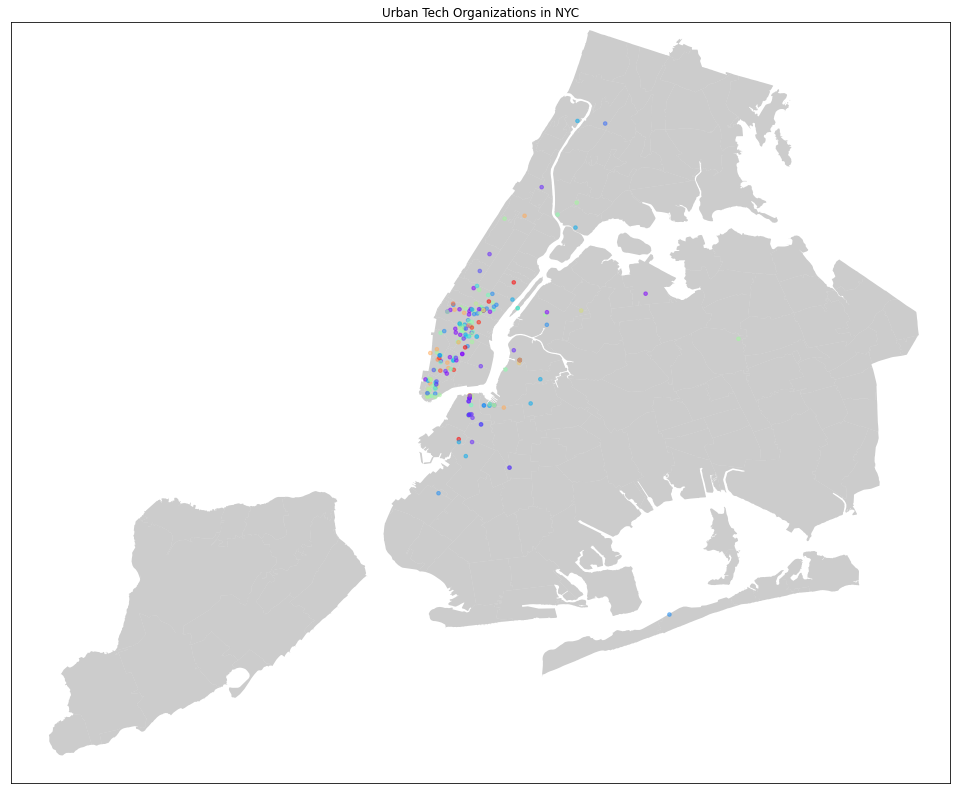

In [93]:
# plot the polygon
base = nyc.plot(color='gray', alpha=0.4, figsize=(20,14))

# plot the marker
#geo_df_passed['geometry'].plot(ax=base, marker='o', alpha=0.7, markersize=7)
geo_df_passed.plot(ax=base, marker='o', alpha=0.5, markersize=13, column='fields_Category', cmap='rainbow')

#legend=True,
#legend_kwds={'loc': 'upper left'}

plt.title('Urban Tech Organizations in NYC')

base.set_xlim(-74.28, -73.68)
base.set_ylim(40.48, 40.92)

base.axes.xaxis.set_visible(False)
base.axes.yaxis.set_visible(False)

In [94]:
# Write Lat/Long to Airtable
# DO NOT RUN THIS AGAIN
# for i in range(df_passed.shape[0]):
#     if pd.isnull(df_passed.iloc[i]['Latitude']) == False:
#         i_d = df_passed.iloc[i]['id']
#         fields = {"Latitude": df_passed.iloc[i]['Latitude'], "Longitude": df_passed.iloc[i]['Longitude']}
#         table.update(i_d, fields)

### PLOTS

In [95]:
df_passed.columns

In [228]:
df_passed['fields_Category'].value_counts()

Innovation Systems                   34
Civic Systems                        29
Energy Systems                       26
Mobility Systems                     24
Building Systems                     22
Food Systems                         18
Labor Systems                        17
Information Systems                  16
Construction Systems                 12
Housing Systems                      11
Health Systems                        9
Waste Systems                         7
Education Systems                     6
Logistics Systems                     6
Public Safety Systems                 4
Natural Systems                       1
Mobility SystemsFood Systems          1
Food SystemsLogistics Systems         1
Logistics SystemsMobility Systems     1
Mobility SystemsLogistics Systems     1
Name: fields_Category, dtype: int64

In [220]:
category_counts = df_passed['fields_Category'].value_counts().reset_index(name='counts')

In [221]:
category_counts

,index,counts
0,Innovation Systems,34
1,Civic Systems,29
2,Energy Systems,26
3,Mobility Systems,24
4,Building Systems,22
5,Food Systems,18
6,Labor Systems,17
7,Information Systems,16
8,Construction Systems,12
9,Housing Systems,11


In [ ]:
category_counts

Text(0.5, 1.0, 'Enterprises by Category')

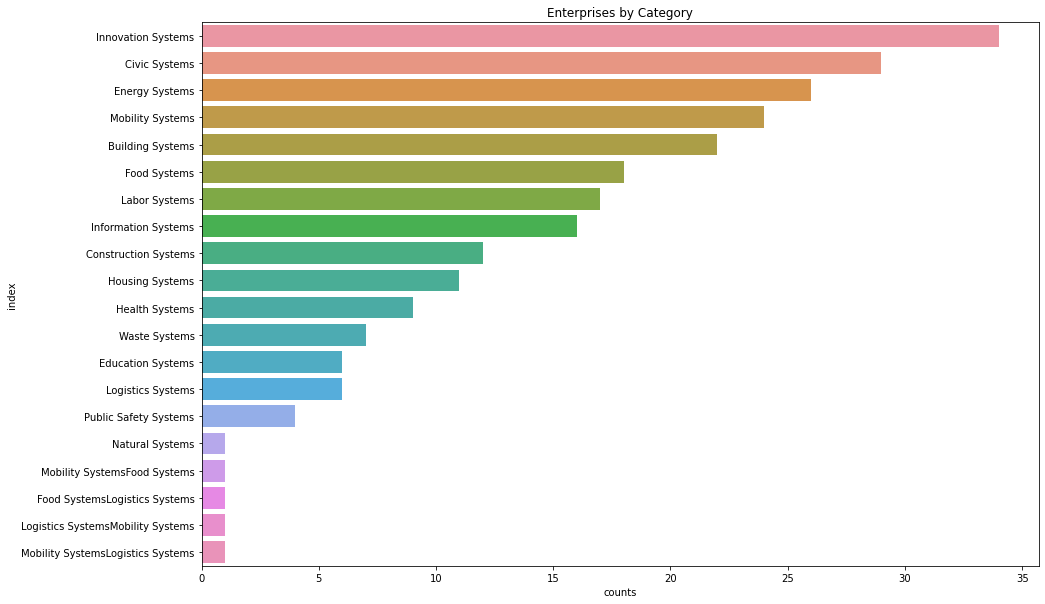

In [222]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(y=category_counts['index'], x=category_counts['counts'])
plt.title('Enterprises by Category')

In [226]:
px.bar(y=category_counts['index'], x=category_counts['counts'], orientation='h', color=category_counts['index'])

In [174]:
category_counts_agg = category_counts.nlargest(5)
category_counts_agg['Everything Else'] = category_counts.sum() - category_counts_agg.sum()

In [212]:
fig = plt.plot(figsize=(15,10))
plt.pie(category_counts_agg, labels=category_counts_agg.index, radius=1.8, 
        colors=['lightcoral','sandybrown','bisque','gold', 'khaki', 'silver'])
my_circle=plt.Circle( (0,0), 1.2, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
#plt.title('The Top 5 Clusters')

In [229]:
category_counts_agg

Innovation Systems     34
Civic Systems          29
Energy Systems         26
Mobility Systems       24
Building Systems       22
Everything Else       111
Name: fields_Category, dtype: int64

In [231]:
#df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
#df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
px.pie(values=category_counts_agg, names=category_counts_agg.index, hole=0.7)

In [183]:
df_passed_sub_cat = df_passed[['fields_Company', 'fields_Category', 'fields_Sub-category']]

In [196]:
grouped = df_passed_sub_cat.groupby(by=['fields_Category', 'fields_Sub-category'], as_index=False).count()

In [197]:
grouped

In [204]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(y=grouped['fields_Category'], x=grouped['fields_Company'], hue=grouped['fields_Sub-category'])
plt.legend([],[], frameon=False)

# ref: https://stackoverflow.com/questions/61102266/stacked-bars-with-hue-in-seaborn-and-pandas

In [ ]:
df_passed['fields_Year Founded']= df_passed['fields_Year Founded'].astype(str).map(lambda x: x[:4])

df_passed['fields_Year Founded'].head()

In [ ]:
#df_passed['fields_Year Founded'] = df_passed['fields_Year Founded']
pd.set_option('display.max_columns', None)
df_passed.sample(7)

In [ ]:
### Ecosystem Overview Tab
employee_counts = df_passed['fields_Employees'].value_counts()
year_founded_counts = df_passed['fields_Year Founded'].value_counts()
investment_counts = df_passed['fields_Total Investment'].value_counts()

In [ ]:
year_founded_counts

In [ ]:
fig = plt.plot(figsize=(15,10))
plt.pie(employee_counts, labels=employee_counts.index, radius=1.8, 
        colors=['lightcoral','sandybrown','bisque','gold', 'khaki', 'silver', 'brown'])
my_circle=plt.Circle( (0,0), 1.2, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
#plt.title('Employee Ranges in NYCs Tech Ecosystem' )

In [ ]:
df_passed_employees = df_passed[['fields_Company', 'fields_Employees']]

grouped_emp = df_passed_employees.groupby(by=['fields_Employees'], as_index=False).count()
grouped_emp.rename(columns={'fields_Employees':'Employee Range', 'fields_Company': 'Number of Enterprises'})

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(y=year_founded_counts, x=year_founded_counts.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#plt.tight_layout()
plt.title('Enterprise Formation Year')

In [ ]:
df_passed_year = df_passed[['fields_Company', 'fields_Year Founded']]

grouped_year = df_passed_year.groupby(by=['fields_Year Founded'], as_index=False).count()
grouped_year.rename(columns={'fields_Year Founded':'Year Founded', 'fields_Company': 'Number of Enterprises'}).sort_values(by=['Year Founded'], ascending=False)



In [ ]:
fig, ax = plt.subplots(figsize=(55,10))
p = sns.barplot(y=investment_counts, x=investment_counts.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=10)
#plt.tight_layout()
p.set_xlabel("Total Investment", fontsize = 40)
p.set_ylabel("Number of Enterprises", fontsize = 40)
p.set_title("Total Investment in Enterprises", fontsize = 60)


In [ ]:
from decimal import Decimal

df_passed_investment = df_passed[['fields_Company', 'fields_Total Investment']]

grouped_investment = df_passed_investment.groupby(by=['fields_Total Investment'], as_index=False).count()
grouped_investment = grouped_investment.rename(columns={'fields_Total Investment':'Total Investment', 'fields_Company': 'Number of Enterprises'})
grouped_investment['Total Investment'] = grouped_investment['Total Investment'].astype(float)

grouped_investment

